# Critique of Mean Variance Analysis + Correlation and Covariance + Levered vs Unlevered Returns with Python

Check out 3 showcases of my mini finance projects!

__Showcase 1 (Critique of Mean Variance Analysis)__ <br><br>

__Objectives__ <br><br>
1. Mean Variance Analysis on a basket of shares to find the stock with 5-year historical best performance
   - Found out that MSFT is on the efficient Frontier - as could be seen in the plot, with relatively okay risk when measured using std, let's see if it's truly reflective of the risk involved 
3. To do that, I first go to find out if MSFT shares are normally distributed
4. Find out mu, sigma, z stat and p value of MSFT



__Lessons Learnt After this Showcase:__ <br></br>
- Assuming that MSFT Returns (generally) follow a Normal Distribution, there is 0% probability that we get that extreme outcomes in a sample.

- MSFT Returns don´t follow a Normal Distribution as they exhibit "Fat Tails". Extreme Events/Outcomes are not reflected in the Mean-Variance Analysis. The Standard Deviation of Returns underestimates true Risk.

In [320]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.4f}'.format
plt.style.use("seaborn-v0_8")
#5 year past data
start = '2019-09-09'
end = '2024-09-09'
symbol = ["BTC-USD", "BA", "EURUSD=X", "GC=F", "MSFT", "^DJI"]
close = yf.download(symbol, start, end ).Close
close

[*********************100%%**********************]  6 of 6 completed


Ticker,BA,BTC-USD,EURUSD=X,GC=F,MSFT,^DJI
Date,,,,,,
2019-09-09,358.7800,10334.9746,1.1021,1502.2000,137.5200,26835.5098
2019-09-10,369.4900,10115.9756,1.1048,1490.3000,136.0800,26909.4297
2019-09-11,382.9400,10178.3721,1.1050,1494.4000,136.1200,27137.0391
2019-09-12,375.6300,10410.1270,1.1013,1498.7000,137.5200,27182.4492
2019-09-13,379.7600,10360.5469,1.1058,1490.9000,137.3200,27219.5195
...,...,...,...,...,...,...
2024-09-04,163.2200,57971.5391,1.1049,2493.3999,408.9000,40974.9688
2024-09-05,162.1500,56160.4883,1.1080,2511.3999,408.3900,40755.7500
2024-09-06,157.6200,53948.7539,1.1111,2493.5000,401.7000,40345.4102


In [322]:
close

Ticker,BA,BTC-USD,EURUSD=X,GC=F,MSFT,^DJI
Date,,,,,,
2019-09-09,358.7800,10334.9746,1.1021,1502.2000,137.5200,26835.5098
2019-09-10,369.4900,10115.9756,1.1048,1490.3000,136.0800,26909.4297
2019-09-11,382.9400,10178.3721,1.1050,1494.4000,136.1200,27137.0391
2019-09-12,375.6300,10410.1270,1.1013,1498.7000,137.5200,27182.4492
2019-09-13,379.7600,10360.5469,1.1058,1490.9000,137.3200,27219.5195
...,...,...,...,...,...,...
2024-09-04,163.2200,57971.5391,1.1049,2493.3999,408.9000,40974.9688
2024-09-05,162.1500,56160.4883,1.1080,2511.3999,408.3900,40755.7500
2024-09-06,157.6200,53948.7539,1.1111,2493.5000,401.7000,40345.4102


In [324]:
close["BA_TR"] = df.BA
close["MSFT_TR"] = df.MSFT

In [326]:
close

Ticker,BA,BTC-USD,EURUSD=X,GC=F,MSFT,^DJI,BA_TR,MSFT_TR
Date,,,,,,,,
2019-09-09,358.7800,10334.9746,1.1021,1502.2000,137.5200,26835.5098,358.7800,137.5200
2019-09-10,369.4900,10115.9756,1.1048,1490.3000,136.0800,26909.4297,369.4900,136.0800
2019-09-11,382.9400,10178.3721,1.1050,1494.4000,136.1200,27137.0391,382.9400,136.1200
2019-09-12,375.6300,10410.1270,1.1013,1498.7000,137.5200,27182.4492,375.6300,137.5200
2019-09-13,379.7600,10360.5469,1.1058,1490.9000,137.3200,27219.5195,379.7600,137.3200
...,...,...,...,...,...,...,...,...
2024-09-04,163.2200,57971.5391,1.1049,2493.3999,408.9000,40974.9688,163.2200,408.9000
2024-09-05,162.1500,56160.4883,1.1080,2511.3999,408.3900,40755.7500,162.1500,408.3900
2024-09-06,157.6200,53948.7539,1.1111,2493.5000,401.7000,40345.4102,157.6200,401.7000


In [328]:
returns = close.apply(lambda x: np.log(x.dropna() / x.dropna().shift()))
returns

Ticker,BA,BTC-USD,EURUSD=X,GC=F,MSFT,^DJI,BA_TR,MSFT_TR
Date,,,,,,,,
2019-09-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-10,0.0294,-0.0214,0.0025,-0.0080,-0.0105,0.0028,0.0294,-0.0105
2019-09-11,0.0358,0.0061,0.0002,0.0027,0.0003,0.0084,0.0358,0.0003
2019-09-12,-0.0193,0.0225,-0.0033,0.0029,0.0102,0.0017,-0.0193,0.0102
2019-09-13,0.0109,-0.0048,0.0041,-0.0052,-0.0015,0.0014,0.0109,-0.0015
...,...,...,...,...,...,...,...,...
2024-09-04,0.0136,0.0094,-0.0017,0.0014,-0.0013,0.0009,0.0136,-0.0013
2024-09-05,-0.0066,-0.0317,0.0029,0.0072,-0.0012,-0.0054,-0.0066,-0.0012
2024-09-06,-0.0283,-0.0402,0.0028,-0.0072,-0.0165,-0.0101,-0.0283,-0.0165


In [330]:
summary = returns.agg(["mean", "std"]).T
summary

,mean,std
Ticker,,
BA,-0.0007,0.0322
BTC-USD,0.0009,0.0343
EURUSD=X,0.0000,0.0046
GC=F,0.0004,0.0101
MSFT,0.0009,0.0191
^DJI,0.0003,0.0131
BA_TR,-0.0007,0.0322
MSFT_TR,0.0009,0.0191


In [332]:
summary.columns = ["Mean", "Std"]
summary

,Mean,Std
Ticker,,
BA,-0.0007,0.0322
BTC-USD,0.0009,0.0343
EURUSD=X,0.0000,0.0046
GC=F,0.0004,0.0101
MSFT,0.0009,0.0191
^DJI,0.0003,0.0131
BA_TR,-0.0007,0.0322
MSFT_TR,0.0009,0.0191


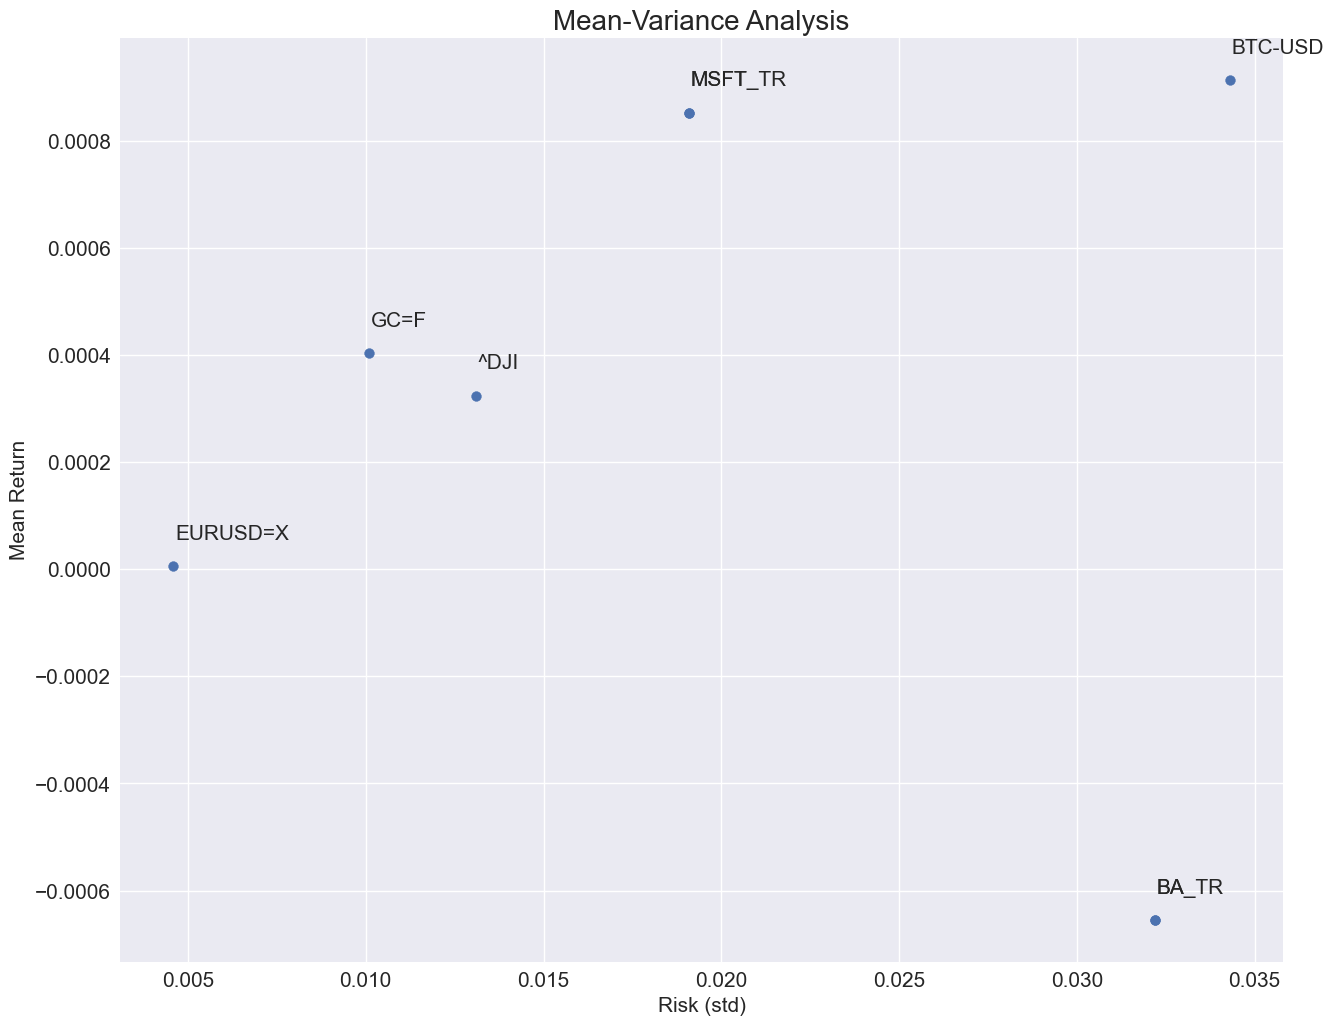

In [429]:
summary.plot(kind = "scatter", x = "Std", y = "Mean", figsize = (15,12), s = 50, fontsize = 15)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "Std"]+0.00005, summary.loc[i, "Mean"]+0.00005), size = 15)
plt.xlabel("Risk (std)", fontsize = 15)
plt.ylabel("Mean Return", fontsize = 15)
plt.title("Mean-Variance Analysis", fontsize = 20)
plt.show()

## Normality of Financial Returns 

In [450]:
plt.style.use("seaborn-v0_8")

In [348]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.4f}'.format
plt.style.use("seaborn-v0_8")
#5 year past data
start = '2019-09-09'
end = '2024-09-09'
symbol = "MSFT"
msft = yf.download(symbol, start, end )
msft = msft.Close
msft

[*********************100%%**********************]  1 of 1 completed


Date
2019-09-09   137.5200
2019-09-10   136.0800
2019-09-11   136.1200
2019-09-12   137.5200
2019-09-13   137.3200
               ...   
2024-08-30   417.1400
2024-09-03   409.4400
2024-09-04   408.9000
2024-09-05   408.3900
2024-09-06   401.7000
Name: Close, Length: 1258, dtype: float64

In [352]:
msft["log_ret"] = np.log(msft / msft.shift()) 
msft

/var/folders/bl/tb4yc6js67lbf9670p_lh1km0000gn/T/ipykernel_78813/1977553635.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  msft["log_ret"] = np.log(msft / msft.shift())


Date
2019-09-09 00:00:00                                             137.5200
2019-09-10 00:00:00                                             136.0800
2019-09-11 00:00:00                                             136.1200
2019-09-12 00:00:00                                             137.5200
2019-09-13 00:00:00                                             137.3200
                                             ...                        
2024-09-03 00:00:00                                             409.4400
2024-09-04 00:00:00                                             408.9000
2024-09-05 00:00:00                                             408.3900
2024-09-06 00:00:00                                             401.7000
log_ret                Date
2019-09-09       NaN
2019-09-10   -0.0105...
Name: Close, Length: 1259, dtype: object

In [354]:
msft.describe()

count    1259.0000
unique   1226.0000
top       137.5200
freq        2.0000
Name: Close, dtype: float64

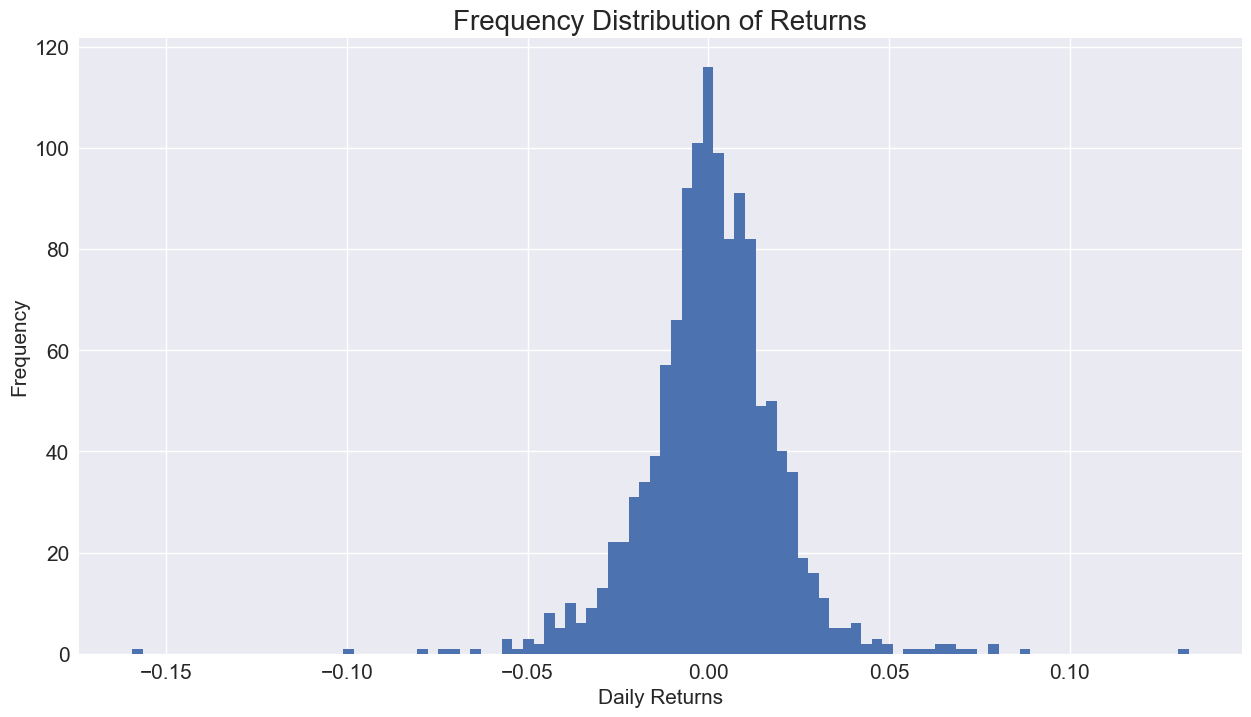

In [356]:
msft.log_ret.plot(kind = "hist", figsize = (15 ,8), bins = 100, fontsize = 15, density = False) # Frequency Distribution of log returns
plt.xlabel("Daily Returns", fontsize = 15)
plt.ylabel("Frequency", fontsize = 15)
plt.title("Frequency Distribution of Returns", fontsize = 20)
plt.show()

__Do MSFT Returns follow a Normal Distribution?__ <br><br>
A normally distributed random variable can be fully described by its 
- mean
- standard deviation

In [365]:
mu = msft.log_ret.mean()
mu

0.0008527734125784727

In [367]:
sigma = msft.log_ret.std()
sigma

0.019092989140589746

In [369]:
import scipy.stats as stats

In [422]:
x = np.linspace(msft.log_ret.min(), msft.log_ret.max(), 10000)
x

array([-0.15945341, -0.15942417, -0.15939493, ...,  0.1328705 ,
        0.13289974,  0.13292898])

In [424]:
y = stats.norm.pdf(x, loc = mu, scale = sigma) # creating y values a for normal distribution with mu, sigma
y

array([1.02905557e-14, 1.04237211e-14, 1.05585849e-14, ...,
       8.67514316e-10, 8.58375161e-10, 8.49330293e-10])

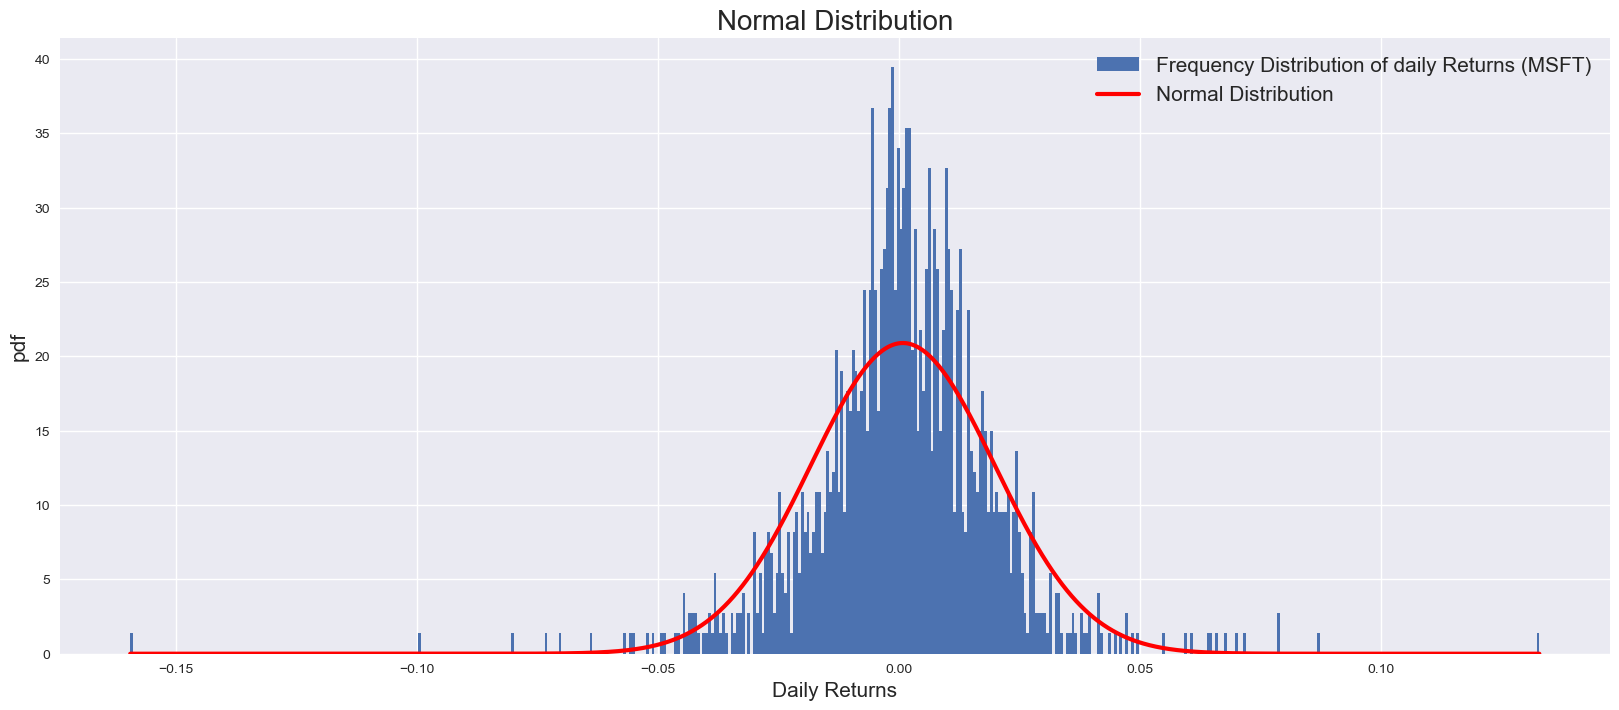

In [375]:
plt.figure(figsize = (20, 8))
plt.hist(msft.log_ret, bins = 500, density = True, label = "Frequency Distribution of daily Returns (MSFT)")
plt.plot(x, y, linewidth = 3, color = "red", label = "Normal Distribution")
plt.title("Normal Distribution", fontsize = 20)
plt.xlabel("Daily Returns", fontsize = 15)
plt.ylabel("pdf", fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

__-> MSFT Returns exhibit "Fat Tails" (extreme positive/negative outcomes).__ 

__Testing the normality of MSFT Returns based on the sample (SEPT 2019 to SEPT 2024):__ <br>
__-> Hypothesis Test with H0 Hypothesis: MSFT Returns (full population) follow a normal Distribution.__ 

In [407]:
z_stat, p_value = stats.normaltest(msft.log_ret.dropna())

In [405]:
z_stat # high values -> reject H0

211.59254382887784

In [403]:
p_value # low values (close to zero) -> reject H0

1.1304800474743088e-46

In [415]:
round(p_value)

0

__Showcase 2 (Correlation and Covariance)__ <br><br>


Do instruments/assets __move together__ (and to what extent)? <br>

Three cases:
- unrelated (__no__ relationship/correlation)
- moving together (__positive__ relationship/correlation)
- moving in opposite directions (__negative__ relationship/correlation)

__Objectives__ <br><br>
-  Find out correlation and covariance of a basket of stocks


__Lessons Learnt after this Showcase:__ <br><br>

- Similar assets are (highly) positive correlated. Different assets exhibit low/no/negative correlation.
- In portfolio management it´s beneficial to have assets with low/no/negative correlation (portfolio diversification effect).

In [558]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.4f}'.format
plt.style.use("seaborn-v0_8")
#5 year past data
start = '2019-09-09'
end = '2024-09-09'
symbol = ["BTC-USD", "BA", "EURUSD=X", "GC=F", "MSFT", "^DJI"]
close = yf.download(symbol, start, end ).Close

[*********************100%%**********************]  6 of 6 completed


In [564]:
close
close["USDEUR=X"] = 1/close["EURUSD=X"]


In [566]:
returns = close.apply(lambda x: np.log(x.dropna() / x.dropna().shift()))
returns

Ticker,BA,BTC-USD,EURUSD=X,GC=F,MSFT,^DJI,USDEUR=X
Date,,,,,,,
2019-09-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-10,0.0294,-0.0214,0.0025,-0.0080,-0.0105,0.0028,-0.0025
2019-09-11,0.0358,0.0061,0.0002,0.0027,0.0003,0.0084,-0.0002
2019-09-12,-0.0193,0.0225,-0.0033,0.0029,0.0102,0.0017,0.0033
2019-09-13,0.0109,-0.0048,0.0041,-0.0052,-0.0015,0.0014,-0.0041
...,...,...,...,...,...,...,...
2024-09-04,0.0136,0.0094,-0.0017,0.0014,-0.0013,0.0009,0.0017
2024-09-05,-0.0066,-0.0317,0.0029,0.0072,-0.0012,-0.0054,-0.0029
2024-09-06,-0.0283,-0.0402,0.0028,-0.0072,-0.0165,-0.0101,-0.0028


In [568]:
returns.cov() # covariance (hard to interpret)

Ticker,BA,BTC-USD,EURUSD=X,GC=F,MSFT,^DJI,USDEUR=X
Ticker,,,,,,,
BA,0.0010,0.0003,0.0000,0.0000,0.0002,0.0003,-0.0000
BTC-USD,0.0003,0.0012,0.0000,0.0000,0.0002,0.0002,-0.0000
EURUSD=X,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000
GC=F,0.0000,0.0000,0.0000,0.0001,0.0000,0.0000,-0.0000
MSFT,0.0002,0.0002,0.0000,0.0000,0.0004,0.0002,-0.0000
^DJI,0.0003,0.0002,0.0000,0.0000,0.0002,0.0002,-0.0000
USDEUR=X,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,0.0000


In [570]:
returns.corr() # correlation coefficient (easy to interpret)

Ticker,BA,BTC-USD,EURUSD=X,GC=F,MSFT,^DJI,USDEUR=X
Ticker,,,,,,,
BA,1.0000,0.2415,0.0132,0.0992,0.3834,0.6914,-0.0132
BTC-USD,0.2415,1.0000,0.0088,0.1263,0.3402,0.3413,-0.0088
EURUSD=X,0.0132,0.0088,1.0000,0.0684,0.0018,0.0189,-1.0000
GC=F,0.0992,0.1263,0.0684,1.0000,0.0853,0.1092,-0.0684
MSFT,0.3834,0.3402,0.0018,0.0853,1.0000,0.7209,-0.0018
^DJI,0.6914,0.3413,0.0189,0.1092,0.7209,1.0000,-0.0189
USDEUR=X,-0.0132,-0.0088,-1.0000,-0.0684,-0.0018,-0.0189,1.0000


Three cases:
- no correlation: __correlation coefficient == 0__
- moving together: __0 < correlation coefficient <= 1__ (positive)
- moving in opposite directions: __-1 <= correlation coefficient < 0__ (negative)

In [573]:
import seaborn as sns

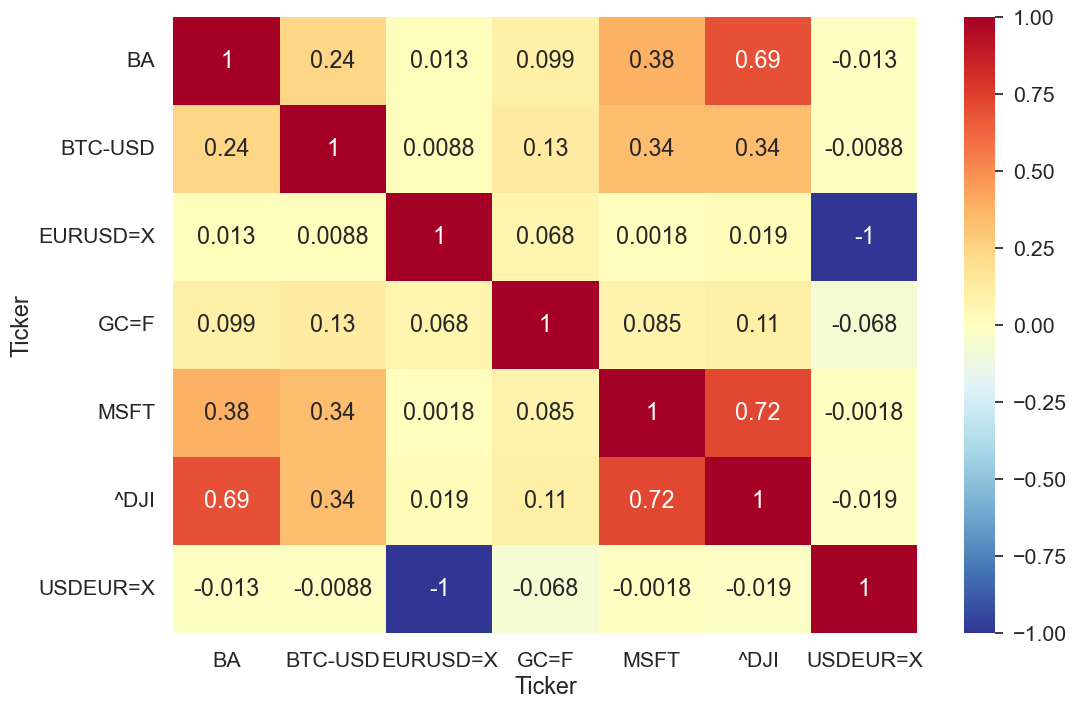

In [575]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.4)
sns.heatmap(returns.corr(), cmap = "RdYlBu_r", annot = True)
plt.show()

--------------------------------

__Showcase 3 (levered vs unlevered returns)__

__Objectives:__

1. Calculate levered returns for Bitcoin (leverage = 4). 

2. Visualize and compare with unlevered Investment.


---------------------------------------------

In [616]:
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:.4f}'.format
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")
close = pd.read_csv("close.csv", index_col = "Date", parse_dates = ["Date"])
btc = close['BTC-USD'].copy().to_frame()
btc['returns'] = btc.pct_change()
leverage = 4
btc['levered_returns'] = btc['returns']*leverage
btc

/var/folders/bl/tb4yc6js67lbf9670p_lh1km0000gn/T/ipykernel_78813/2808305270.py:8: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  btc['returns'] = btc.pct_change()


,BTC-USD,returns,levered_returns
Date,,,
2014-10-01,383.6150,NaN,NaN
2014-10-02,375.0720,-0.0223,-0.0891
2014-10-03,359.5120,-0.0415,-0.1659
2014-10-04,328.8660,-0.0852,-0.3410
2014-10-05,320.5100,-0.0254,-0.1016
...,...,...,...
2021-05-27,38436.9688,-0.0218,-0.0873
2021-05-28,35697.6055,-0.0713,-0.2851
2021-05-29,34616.0664,-0.0303,-0.1212


<Axes: xlabel='Date'>

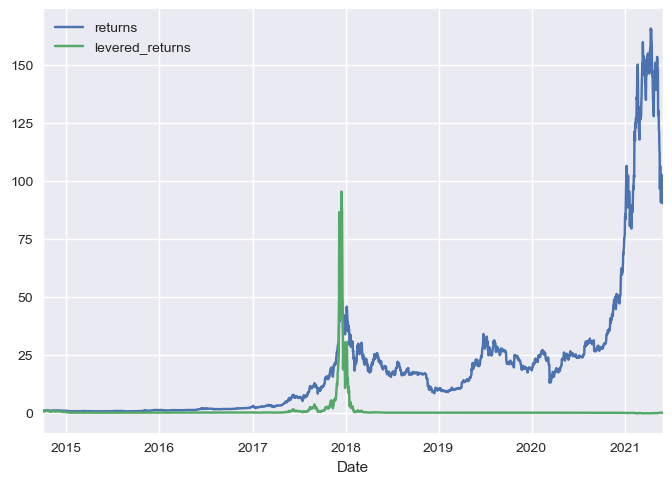

In [618]:
btc[["returns", "levered_returns"]].add(1).cumprod().plot()